# Taylor problem 1.50

This problem attacks the "oscillating skateboard" problem described in Example 1.2 of Taylor.  A Newton's 2nd law analysis leads to the differential equation for the angle $\phi$ in radians:

$
\begin{align}
  \ddot\phi = -\frac{g}{R}\sin\phi
  \;.
\end{align}
$

This is a 2nd order, *nonlinear* differential equation.  We note it is the same equation describing the motion of a simple (undamped, not driven) pendulum.

Problem 1.50 has us solving this equation numerically for particular initial conditions and comparing the plots to the approximate solution based on the small angle approximation for $\sin\phi$.

In [1]:
%matplotlib inline

In [54]:
import numpy as np
from scipy.integrate import ode, odeint

import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 18})


We'll define the right-hand side (rhs) of the ordinary differential equations (ODE) using the standard form from the Python basics notebook:

$$\begin{align}
   \frac{d}{dt}\left(\begin{array}{c}
                          \phi \\
                          \dot\phi
                      \end{array}\right)
               = \left(\begin{array}{c}
                          \dot\phi \\
                          -g \sin(\phi)
                       \end{array}\right)
\end{align}$$

In [55]:
def ode_rhs_exact(u_vec, t, *params):
    """ 
    Right-hand side (rhs) of the differential equation, with 
    u_vec = [\phi, \dot\phi] and params = [g, R].  Returns the list of
    d(u_vec)/dt, as prescribed by the differential equation.
    
    """
    phi, phidot = u_vec  # We don't actually use x or y here, but could!
    g, R = params
    return [phidot, -g*np.sin(phi)/R]

In [56]:
# parameters
g = 9.8  # in mks units
R = 5   # radius in meters

# absolute and relative tolerances for ode solver
abserr = 1.0e-8
relerr = 1.0e-6

# initial conditions for [phi, phidot]
phi0 = np.pi/180 * 20.
u0_vec = [phi0, 0.]

t_max = 15.  # integration time
t_pts = np.arange(0, t_max, 0.01)

# Integrate the differential equation
phi, phidot = odeint(ode_rhs_exact, u0_vec, t_pts, args=(g, R), 
                     atol=abserr, rtol=relerr).T

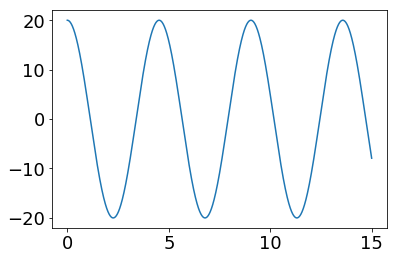

In [57]:
plt.plot(t_pts, 180./np.pi * phi)

In [58]:
def solve_for_phi(phi0, phidot0=0, t_min=0., t_max=1., g=9.8, R=5.):
    """
    Solve the differential equation for the skateboard Example 1.2 in Taylor.
    The result for t, \phi(t) and \dot\phi(t) are returned for a grid with
    t_min < t < t_max and a hardwired (for now) spacing of 0.01 seconds.
    The ODE solver is odeint from scipy, with specified tolerances. 
    Units are mks.
    """

    # absolute and relative tolerances for ode solver
    abserr = 1.0e-8
    relerr = 1.0e-6

    # initial conditions for [phi, phidot]
    u0_vec = [phi0, phidot0]

    t_pts = np.arange(t_min, t_max, 0.01)

    # Integrate the differential equation
    phi, phidot = odeint(ode_rhs_exact, u0_vec, t_pts, args=(g, R), 
                     atol=abserr, rtol=relerr).T
    
    return t_pts, phi, phidot

In [59]:
phi0 = np.pi/180 * 20.
t_pts, phi, phidot = solve_for_phi(phi0, t_max=15.)

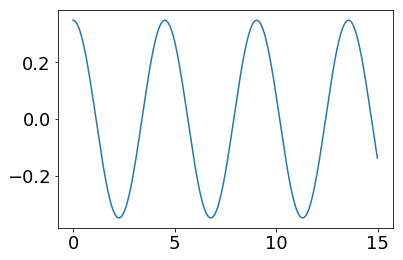

In [60]:
plt.plot(t_pts, phi)

In [61]:
def ode_rhs_small_angle(u_vec, t, *params):
    """ 
    Right-hand side (rhs) of the differential equation, with 
    u_vec = [\phi, \dot\phi] and params = [g, R].  Returns the list of
    d(u_vec)/dt, as prescribed by the differential equation.
    
    """
    phi, phidot = u_vec  # We don't actually use x or y here, but could!
    g, R = params
    return [phidot, -g*phi/R]

In [62]:
def solve_for_phi_all(phi0, phidot0=0, t_min=0., t_max=1., g=9.8, R=5.):
    """
    Solve the differential equation for the skateboard Example 1.2 in Taylor
    using the exact equation and the small angle approximation.
    The result for t, \phi(t) and \dot\phi(t) are returned for a grid with
    t_min < t < t_max and a hardwired (for now) spacing of 0.01 seconds.
    The ODE solver is odeint from scipy, with specified tolerances. 
    Units are mks.
    """

    # absolute and relative tolerances for ode solver
    abserr = 1.0e-8
    relerr = 1.0e-6

    # initial conditions for [phi, phidot]
    u0_vec = [phi0, phidot0]

    t_pts = np.arange(t_min, t_max, 0.01)

    # Integrate the differential equations
    phi, phidot = odeint(ode_rhs_exact, u0_vec, t_pts, args=(g, R), 
                     atol=abserr, rtol=relerr).T
    phi_sa, phidot_sa = odeint(ode_rhs_small_angle, u0_vec, t_pts, args=(g, R), 
                     atol=abserr, rtol=relerr).T
    
    return t_pts, phi, phidot, phi_sa, phidot_sa

In [63]:
phi0 = np.pi/180 * 20.
t_pts, phi, phidot, phi_sa, phidot_sa = solve_for_phi_all(phi0, t_max=15.)


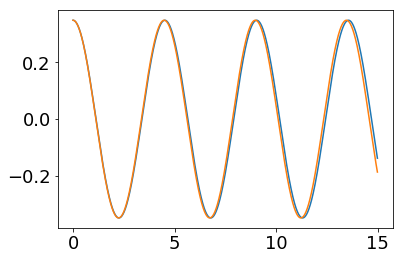

In [64]:
plt.plot(t_pts, phi, t_pts, phi_sa);

### Ok, now for some more systematic plotting

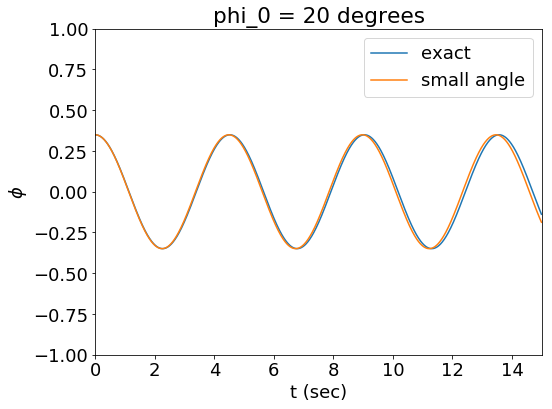

In [71]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlim(0.,15.)
ax.set_ylim(-1.,1.)
ax.set_xlabel('t (sec)')
ax.set_ylabel(r'$\phi$')
ax.set_title('phi_0 = 20 degrees')
line_exact, = ax.plot(t_pts, phi, label='exact')
line_sa, = ax.plot(t_pts, phi_sa, label='small angle')
ax.legend()

fig.savefig('Taylor_prob_1.50.pdf', bbox_inches='tight')

### Now for widgets!

In [66]:
from ipywidgets import interact, fixed
import ipywidgets as widgets

def rad_to_deg(theta_rad):
    """Take as input an angle in radians and return it in degrees."""
    return 180./np.pi * theta_rad

def deg_to_rad(theta_deg):
    """Take as input an angle in degrees and return it in radians."""
    return np.pi/180. * theta_deg


In [51]:
def plot_exact_and_small_angle(phi0_deg=0):
    phi0_rad = deg_to_rad(phi0_deg)
    t_pts, phi_rad, phidot, phi_sa_rad, phidot_sa = \
         solve_for_phi_all(phi0_rad, t_max=15.)
    phi_deg = rad_to_deg(phi_rad)
    phi_sa_deg = rad_to_deg(phi_sa_rad)
    
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(1,1,1)
    line_exact, = ax.plot(t_pts, phi_deg, label='exact')
    line_sa, = ax.plot(t_pts, phi_sa_deg, label='small angle')
    ax.legend()
    ax.set_xlim(0.,15.)
    #ax.set_ylim(-90.,90.)
    ax.set_xlabel('t (sec)')
    ax.set_ylabel(r'$\phi$')
    ax.set_title(r'$\phi_0 = {:.0f}$'.format(phi0_deg))
    plt.show()


In [52]:
interact(plot_exact_and_small_angle, phi0_deg=(0.,90.));

interactive(children=(FloatSlider(value=0.0, description='phi0_deg', max=90.0), Output()), _dom_classes=('widg…

In [53]:
# to avoid the jiggling and do some formatting
phi0_deg_widget = widgets.FloatSlider(min=0., max=120.0, step=0.1, value=0.,
                                     description=r'$\phi_0$ (degrees)',
                                     readout_format='.0f',
                                     continuous_update=False
                                    )
interact(plot_exact_and_small_angle, phi0_deg=phi0_deg_widget);

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='$\\phi_0$ (degrees)', max=1…